<a href="https://colab.research.google.com/github/astroviki/NumericalMethods/blob/main/solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install jupyter-dash
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

import scipy.optimize as opt


### Resctricted three body problem



In [92]:
t_unit = (12.0*u.year.cgs).cgs.value
mass_unit = const.M_sun.cgs.value
length_unit = 5.2*const.au.cgs.value
M1 = 1.0
M2 = 0.5

# Distance between planets in [AU]
distance = 5.2 # AU

nu = 0.1

x1 = -0.5
x2 = x1+1
y1 = 0.0
y2 = 0.0


# Angular speed
Omega = 1.5
G = const.G.cgs


$$ 
U = - \frac{GM_{s}}{r_s} - \frac{GM_p}{r_p} - \frac{1}{2}m(r\omega)^2
$$
kde $M_s,r_s$ je hmotnost Slunce a vzdálenost satelitu od Slunce, obdobně $M_p,r_p$  je hmotnost planety a vzdálenost satelitu do planety. Poslední člen celkového potenciálu $u$, ve kterém $r$ značí vzdálenost satelitu od hmotného středu soustavy a $\omega$ vyjadřuje rotační potenciál v důsledku neinerciálí vztažné soustavy. 
$$
U = -\frac{GMm(1-\mu)}{r_s}-\frac{GMm\mu}{r_p}-\frac{GMm}{2R^3}r^2
$$
kde $M = m_s+m_p$ a $\mu = m_p/M$. Výslednou rovnici můžeme ještě dále upravit
$$
U = \frac{GMm}{R}\left(-\frac{1-\mu}{\xi R}-\frac{\mu}{\eta R}-\frac{1}{2}\frac{(\rho R)^2}{R^3}\right)
$$

In [117]:

def potential(x):
  ksi = x[0]
  eta = x[1]
  u = -(1-nu)/(np.sqrt((ksi+nu)**2+eta**2))\
      -nu/(np.sqrt((ksi-(1-nu))**2+eta**2))\
      -0.5*(ksi**2+eta**2)
  return u

def diff_potentialx(v):
  x = v[0]
  y = v[1]
  u = 0.5*(1-nu)*(2*x+2*nu)/((x+nu)**2+y**2)**(3/2)\
      +0.5*nu*(2*x-2+2*nu)/((x-1+nu)**2+y**2)**(3/2)-x
  return u

def diff_potentialy(v):
  x = v[0]
  y = v[1]
  u = (1-nu)*y/((x+nu)**2+y**2)**(3/2)+nu*y/((x-1+nu)**2\
      +y**2)**(3/2)-y
  return u


In [61]:
N = 100
x = np.linspace(-1.5,1.5,N)
y = np.linspace(-1.5,1.5,N)

X,Y = np.meshgrid(x,y)

Z = potential(np.array([X,Y]))

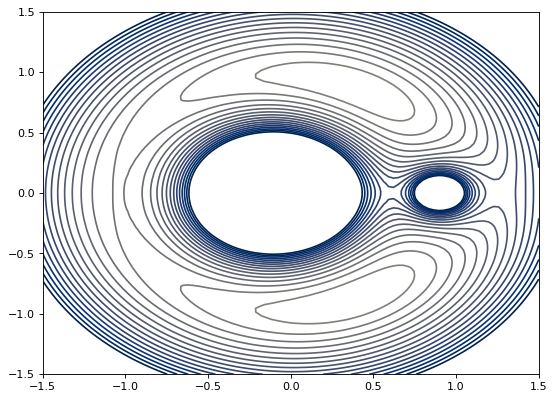

In [6]:
levels=np.linspace(-2.0,-1.0,30)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax1 = plt.contour(X, Y, Z,levels,cmap='cividis')

# Lagrange points

plt.show()


In [87]:
import plotly.graph_objects as go


Zm = ma.masked_less(Z, -2.8)
Z[np.where(Z < -2.8)] = np.nan
#fig = go.Figure(data =
#     go.Contour(x = x, y = y, z = Zm))

fig = go.Figure(
    go.Surface(contours = {
        "x": {"show": False, "start": -1.5, "end": 1.5, "size": 0.1, "color":"black"},
        "z": {"show": True, "start": -1.8, "end": -1.45, "size": 0.05, "color":"black"},
    },
    x = x,
    y = y,
    z = Z, colorscale='solar')
    )
 
fig.update_traces(contours_z=dict(show=True, usecolormap=False,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

1.3203048706054688


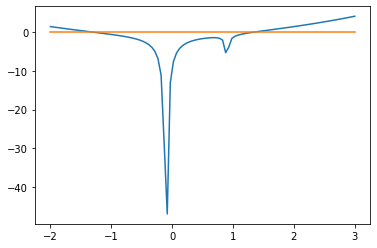

In [29]:
nu = 0.1
def L1L2L3(x):
  value = -(1-nu)/(np.sqrt((x+nu)**2))\
           -nu/(np.sqrt((x-(1-nu))**2))\
           +0.5*(x**2)

  return value


def LagrangePointsL4L5(x):
  ksi = x[0]
  eta = x[1]
  value = -(1-nu)/(np.sqrt((ksi+nu)**2+eta**2))\
           -nu/(np.sqrt((ksi-(1-nu))**2+eta**2))\
           -0.5*(ksi**2+eta**2)
  return -value

a = 0.5
b = 1.5



In [85]:
import plotly.graph_objects as go


Zm = ma.masked_less(Z, -2.8)
Z[np.where(Z < -2.8)] = np.nan
#fig = go.Figure(data =
#     go.Contour(x = x, y = y, z = Zm))

fig = go.Figure(
    go.Surface(contours = {
        "x": {"show": False, "start": -1.5, "end": 1.5, "size": 0.1, "color":"black"},
        "z": {"show": True, "start": -1.8, "end": -1.45, "size": 0.05, "color":"black"},
    },
    x = x,
    y = y,
    z = Z, colorscale='earth')
    )
 
fig.update_traces(contours_z=dict(show=True, usecolormap=False,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

In [132]:
def vdiff(x):
  return [diff_potentialx(x),diff_potentialy(x)]

initial_guesses = [np.array([0.3,0.0]),np.array([1.0,0.]),\
                  np.array([-1.0,0]),np.array([0.3,0.7]),\
                  np.array([0.3,-0.7])]
for guess in initial_guesses:
  y_root = guess
  for i in range(10):
    y_root = opt.fsolve(vdiff,x0=y_root)
  print(y_root)


[0.60903511 0.        ]
[1.25969983 0.        ]
[-1.04160891  0.        ]
[0.4       0.8660254]
[ 0.4       -0.8660254]
